# Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\downloads')

In [4]:
import os
os.getcwd()

'C:\\Users\\dell\\downloads'

### MERGING 12 MONTH DATA IN SINGLE FILE

In [5]:
df = pd.read_csv(".//Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame() 

for file in files:
    df = pd.read_csv(".//Sales_Data//"+ file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
# all data in one file
all_months_data.to_csv("all_data.csv",index = False)

# Read updated DataFrame

In [7]:
df1 = pd.read_csv("all_data.csv")
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
df1.shape

(186305, 6)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


# CleanUp Data

### drop nan rows

In [10]:
df1 = df1.dropna(how= "all")
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Find OR and delete it

In [11]:
df1 = df1[df1['Order Date'].str[0:2] !='Or']

## Convert column to correct type

In [12]:
df1['Quantity Ordered'] = pd.to_numeric(df1['Quantity Ordered'])  #make int
df1['Price Each'] = pd.to_numeric(df1['Price Each']) # make float


# Task 1: adding month column

### Adding Month  Column

In [13]:
df1 ['Month']  = df1['Order Date'].str[0:2]
df1 ['Month'] = df1 ['Month'].astype('int64')
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Task 2: adding Sales column

In [14]:
df1['Sales'] = df1['Quantity Ordered'] + df1['Price Each']
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,13.95
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,100.99
2,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,601.00
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,12.99


## Task 3: adding City column

### let's use .apply()

In [15]:
df1['City'] = df1['Purchase Address'].apply(lambda x:x.split(',')[1])

#df1 = df1.drop(columns= 'column', inplace = True)

df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,13.95,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,100.99,Boston
2,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,601.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,12.99,Los Angeles


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186304
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int32         
 10  Minute            185950 non-null  int32         
 11  Order Date_str    185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(5)
memory usage: 17.0+ MB


In [58]:
df.shape

(11646, 7)

In [59]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date_str
count,11646,11646,11646,11646,11646,11646,11646
unique,11208,20,7,18,9495,11032,9495
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address,Order Date
freq,17,1454,10490,1454,17,17,17


#### Q1. What is the best month for sales? how much was earned that month?

In [16]:
results = df1.groupby('Month')[['Quantity Ordered', 'Price Each', 'Sales']].sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822671.38
2,13449,2188884.72,2202333.72
3,17005,2791207.83,2808212.83
4,20558,3367671.02,3388229.02
5,18667,3135125.13,3153792.13
6,15253,2562025.61,2577278.61
7,16072,2632539.56,2648611.56
8,13448,2230345.42,2243793.42
9,13109,2084992.09,2098101.09


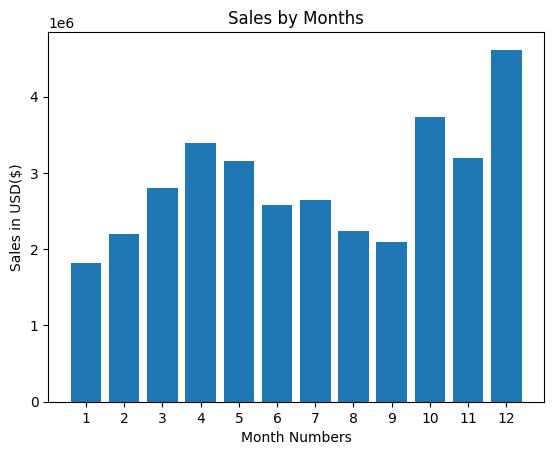

In [17]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Numbers')
plt.title("Sales by Months")
plt.show()

### Q2. What city had a highest number of sales

In [18]:
results = df1.groupby('City')[['Quantity Ordered', 'Price Each', 'Sales']].sum()
results

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602,2779908.20,2796510.20
Austin,11153,1809873.61,1821026.61
Boston,22528,3637409.77,3659937.77
Dallas,16730,2752627.82,2769357.82
Los Angeles,33289,5421435.23,5454724.23
New York City,27932,4635370.83,4663302.83
Portland,14053,2307747.47,2321800.47
San Francisco,50239,8211461.74,8261700.74
Seattle,16553,2733296.01,2749849.01


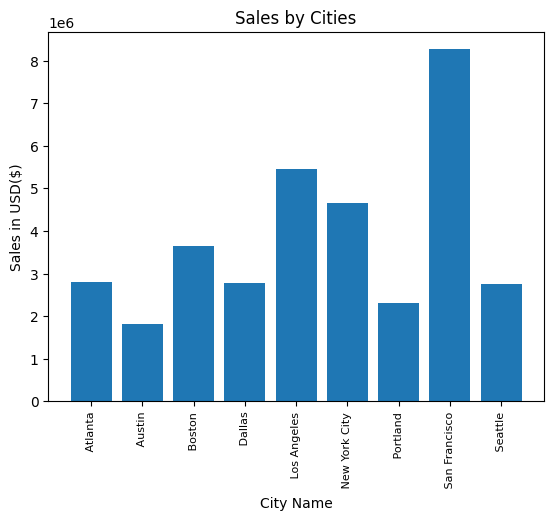

In [19]:
import matplotlib.pyplot as plt

City = [city for city, df in df1.groupby('City')]

plt.bar(City,results['Sales'])
plt.xticks(City, rotation = 90,size =8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City Name')
plt.title("Sales by Cities")
plt.show()

### Q3. What time should we display advertisements to Maximize likelihood of customer's buying product?

In [20]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])

In [21]:
df1['Hour'] = df1['Order Date'].dt.hour
df1['Minute'] = df1['Order Date'].dt.minute
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,13.95,Dallas,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,100.99,Boston,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,601.00,Los Angeles,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12.99,Los Angeles,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,12.99,Los Angeles,9,27


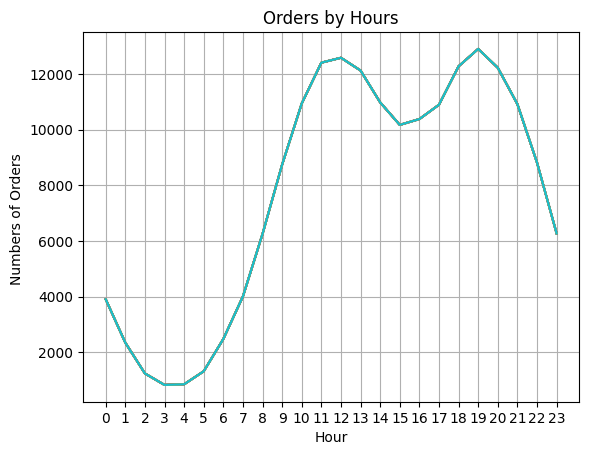

In [22]:
hours = [hour for hour, df in df1.groupby('Hour')]

plt.plot(hours,df1.groupby(['Hour']).count())
plt.xticks(hours)
plt.title("Orders by Hours")
plt.xlabel('Hour')
plt.ylabel('Numbers of Orders ')
plt.grid()
plt.show()

### Q4. What products are most often sold together?

In [23]:
df2 = df1[df1['Order ID'].duplicated(keep = False)]

df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,601.00,Los Angeles,14,38,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12.99,Los Angeles,14,38,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,601.00,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,12.95,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,100.99,Boston,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [24]:
df2 = df2[['Order ID','Grouped']].drop_duplicates()
df2.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [25]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

In [26]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Q5. What product sold the most? Why do you think it sold the most?

In [27]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,13.95,Dallas,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,100.99,Boston,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,601.00,Los Angeles,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12.99,Los Angeles,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,12.99,Los Angeles,9,27


In [56]:
print(df1.dtypes)

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int32
Minute                       int32
Order Date_str              object
dtype: object


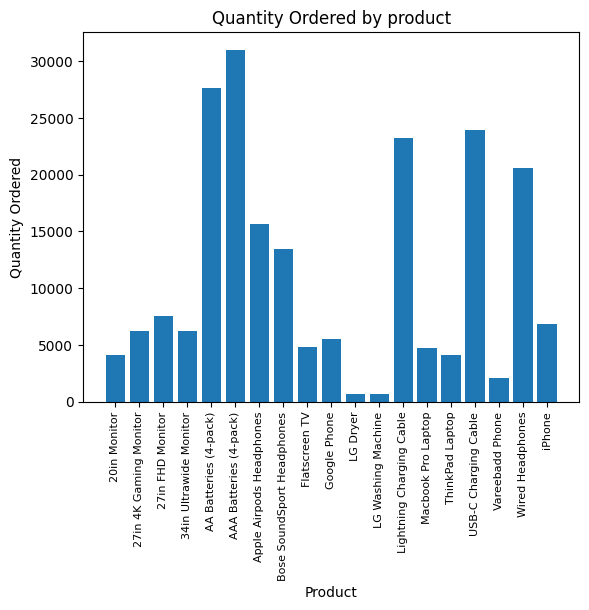

In [62]:
# exclude datetime column "Order Date" from groupby operation
product_group = df1.drop('Order Date', axis=1).groupby('Product')

# perform sum operation on non-datetime columns
Quantity_Ordered = product_group.sum()['Quantity Ordered']

# get list of products
products = [product for product, df in product_group]

# plot bar chart
plt.bar(products, Quantity_Ordered)
plt.xticks(products, rotation = 90,size =8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.title("Quantity Ordered by product")
plt.show()

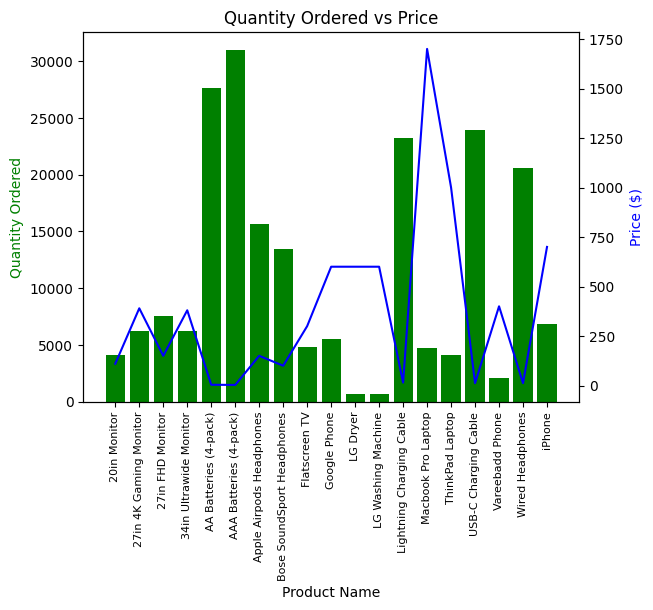

In [70]:
prices = df1.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, Quantity_Ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.title("Quantity Ordered vs Price")

plt.show()